In [13]:
import pathlib
import shutil
from idrstream.idr_stream import IdrStream

import idrstream.PyBaSiC.pybasic as pybasic
from matplotlib import pyplot as plt

In [2]:
idr_id = "idr0013"
tmp_dir = pathlib.Path("tmp2/")
final_data_dir = pathlib.Path("data/")
# try:
#     shutil.rmtree(tmp_dir)
#     #shutil.rmtree(final_data_dir)
# except:
#     print("No files to remove")

stream = IdrStream(idr_id, tmp_dir, final_data_dir, log=False)

aspera_path = pathlib.Path("/home/roshankern/.aspera/ascli/sdk/ascp")
aspera_key_path = pathlib.Path("example_files/asperaweb_id_dsa.openssh")
screens_path = pathlib.Path("example_files/idr0013-screenA-plates.tsv")
save_dir = pathlib.Path("data/")

stream.init_downloader(aspera_path, aspera_key_path, screens_path)
stream.downloader.download_image("LT0001_02", 4, tmp_dir)

fiji_path = pathlib.Path("/home/roshankern/Desktop/Github/IDR_stream_prototype/preprocess_data/Fiji.app")
stream.init_preprocessor(fiji_path)

Completed: 75739K bytes transferred in 3 seconds
 (206777K bits/sec), in 1 file.
[INFO] Overriding Leica ROI Reader; identifier: command:de.biovoxxel.utilities.RoiReader; jar: file:/home/roshankern/Desktop/Github/IDR_stream_prototype/preprocess_data/Fiji.app/plugins/Biovoxxel_Plugins-2.5.6.jar


[ERROR] Cannot create plugin: org.scijava.plugins.scripting.javascript.JavaScriptScriptLanguage


In [6]:
movie_path = pathlib.Path("/home/roshankern/Desktop/Github/IDR_stream/tmp2/00004_01.ch5")
movie_arr = stream.preprocessor.load_movie_data(movie_path)

CellH5Reader initializing /home/roshankern/Desktop/Github/IDR_stream/tmp2/00004_01.ch5
Plate :/sample/0/plate/
Well :/sample/0/plate/LT0001_02--ex2005_11_16--sp2005_02_17--tt17--c3/experiment/
Site :/sample/0/plate/LT0001_02--ex2005_11_16--sp2005_02_17--tt17--c3/experiment/00004/position/
Parse segmentation ROIs for cell object primary__test : 0


In [15]:
corrected_movie_arr = stream.preprocessor.pybasic_illumination_correction(movie_arr)

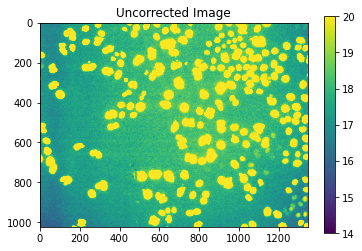

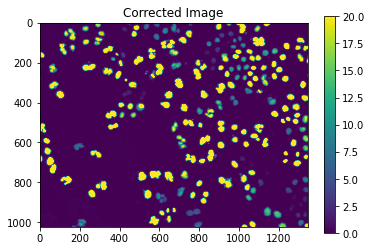

In [20]:
i = 50
plt.title('Uncorrected Image')
plt.imshow(movie_arr[i], vmax=20)
plt.colorbar()
plt.show()
plt.title('Corrected Image')
plt.imshow(corrected_movie_arr[i], vmax=20)
plt.colorbar()
plt.show()

In [21]:
movie_arr2 = movie_arr[49:52]
movie_arr2.shape

(3, 1024, 1344)

In [22]:
corrected_movie_arr2 = stream.preprocessor.pybasic_illumination_correction(movie_arr2)

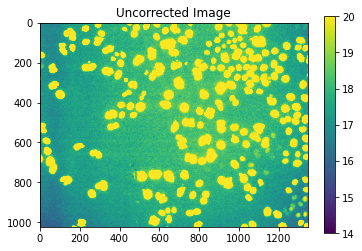

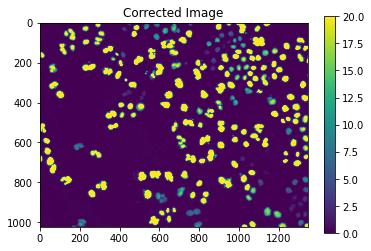

In [25]:
i = 1
plt.title('Uncorrected Image')
plt.imshow(movie_arr2[i], vmax=20)
plt.colorbar()
plt.show()
plt.title('Corrected Image')
plt.imshow(corrected_movie_arr2[i], vmax=20)
plt.colorbar()
plt.show()